In [19]:
import meep as mp
import math
import matplotlib
#matplotlib.use('agg')
import numpy as np
import matplotlib.pyplot as plt
from meep.materials import BK7
import h5py

# wvl_min = 0.760  # min wavelength
# wvl_max = 0.940  # max wavelength
# fmin = 1 / wvl_max  # min frequency
# fmax = 1 / wvl_min  # max frequency
# fcen = 0.5 * (fmin + fmax)  # center frequency
# df = fmax - fmin  # frequency width
# nfreq = 200  # number of frequency bins
wvl_cent = 0.830  # wavelength
fcen=1/wvl_cent
df =1 #pulse width (in frequency)

s = 20
resolution = 50
dpml = 2

cell_size = mp.Vector3(s,s,0)

boundary_layers = [mp.PML(thickness=dpml)]

In [20]:
beam_x0 = mp.Vector3(0,2.5)    # beam focus (relative to source center)
rot_angle = 0  # CCW rotation angle about z axis (0: +y axis)
beam_kdir = mp.Vector3(0,1,0).rotate(mp.Vector3(0,0,1),math.radians(rot_angle))  # beam propagation direction
beam_w0 = 0.3  # beam waist radius
beam_E0 = mp.Vector3(0,0,1)

sources = [mp.GaussianBeamSource(src=mp.GaussianSource(fcen,fwidth=df),
                                 center=mp.Vector3(0,-0.5*s+dpml+1.0),
                                 size=mp.Vector3(s),
                                 beam_x0=beam_x0,
                                 beam_kdir=beam_kdir,
                                 beam_w0=beam_w0,
                                 beam_E0=beam_E0,
                                 amplitude=5)]

In [40]:
# cover slip+sample+medium 2 important inputs: radius of sample and thickness od coverslip
thickness_slide=4
center_slide=-0.5*s+dpml+0.5*thickness_slide
thickness_medium=s-2*dpml-thickness_slide
center_medium=0.5*s-dpml-0.5*thickness_medium

distance_cylender_slide=0.5
Radius_cylinder=2.5
center_cylinder=-0.5*s+dpml+thickness_slide+distance_cylender_slide+Radius_cylinder



geometry = [mp.Block(mp.Vector3(s-2*dpml,thickness_slide,mp.inf),
                     center=mp.Vector3(0,center_slide,0),
                     material=BK7),
            mp.Block(mp.Vector3(s-2*dpml,thickness_medium,mp.inf),
                     center=mp.Vector3(0,center_medium,0),
                     material=mp.Medium(index=1.33)),
            mp.Cylinder(radius=Radius_cylinder,center=mp.Vector3(0,center_cylinder,0),
                        axis=mp.Vector3(0,0,1),
                        material=mp.Medium(index=1.4),
                        height=4),
            ]

In [41]:
sim = mp.Simulation(cell_size=cell_size,
                    boundary_layers=boundary_layers,
                    geometry=geometry,
                    sources=sources,
                    resolution=resolution,
                    force_complex_fields=True,
                    Courant=0.5)

In [42]:
sim.run(mp.at_beginning(mp.output_epsilon),
        mp.to_appended("ez", mp.at_every(1, mp.output_efield_z)),
        mp.to_appended("poy",mp.at_every(1,mp.output_poynting)),
        mp.to_appended("energy",mp.at_every(1,mp.output_dpwr)),
        until=30)

-----------
Initializing structure...
time for choose_chunkdivision = 0.000528097 s
Working in 2D dimensions.
Computational cell is 20 x 20 x 0 with resolution 50
     block, center = (0,-1,0)
          size (-1,4,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,-1,0)
          size (-1,-1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1.7689,1.7689,1.7689)
     cylinder, center = (0,-1,0)
          radius 2.5, height 4, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1.96,1.96,1.96)
time for set_epsilon = 1.34288 s
lorentzian susceptibility: frequency=0.0982658, gamma=0
lorentzian susceptibility: frequency=7.0679, gamma=0
lorentzian susceptibility: frequency=12.9092, gamma=0
-----------
Meep: using complex fields.
creating output file "./eps-000000.00.h5"...
creating output file "./ez.h5"...
creating output file "./poy.h5"...
creating outp

In [43]:
# sim.plot2D(fields=mp.Ez,
#            output_plane=mp.Volume(center=mp.Vector3(),
#                                   size=mp.Vector3(s,s)))

# eps_data = sim.get_array(center=mp.Vector3(), size=cell_size, component=mp.Dielectric)
# ez_data = sim.get_array(center=mp.Vector3(), size=cell_size, component=mp.D_EnergyDensity)
# plt.figure()
# plt.imshow(eps_data.transpose(), interpolation='spline36', cmap='binary')
# plt.imshow(ez_data.transpose(), interpolation='spline36', cmap='RdBu', alpha=0.9)
# plt.axis('off')
# plt.show()


In [44]:
E_field=h5py.File('ez.h5','r')

E_image = E_field.get('ez.i')#imaginary part
E_image= np.array(E_image)



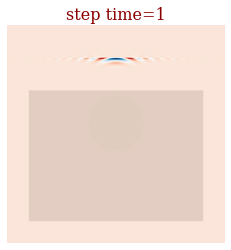

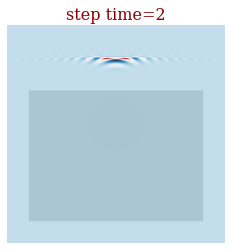

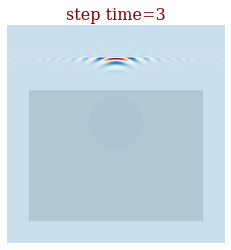

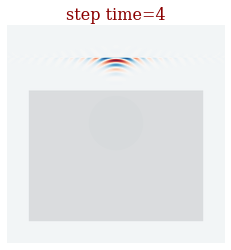

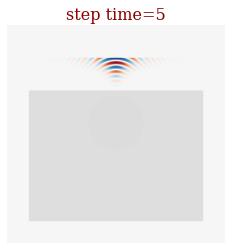

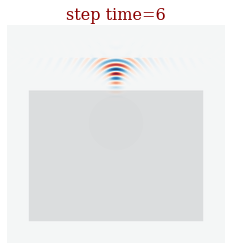

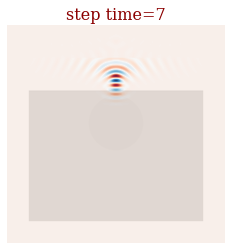

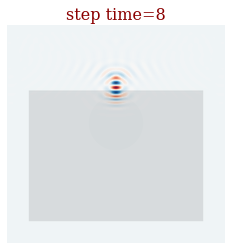

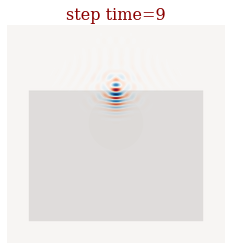

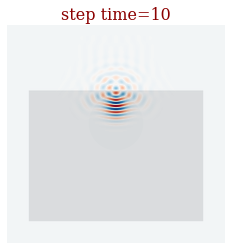

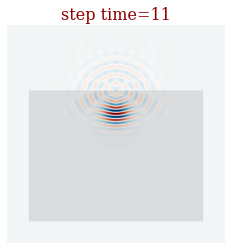

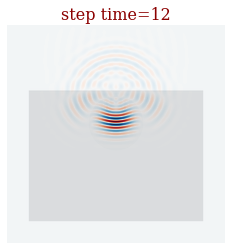

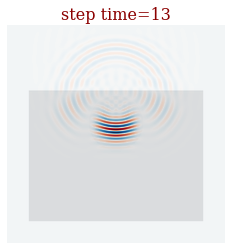

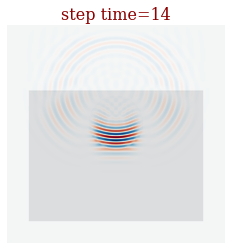

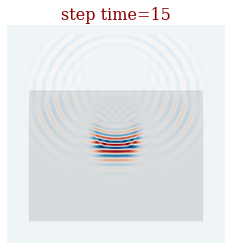

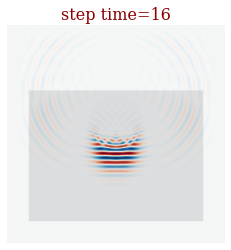

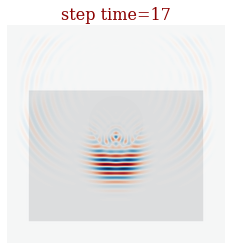

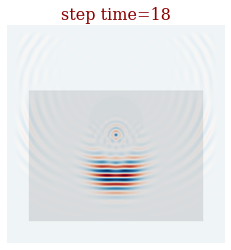

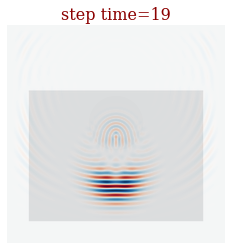

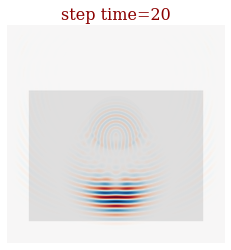

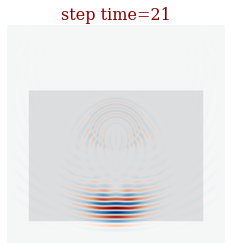

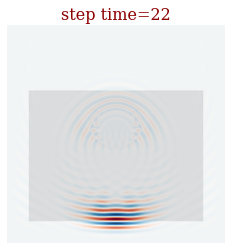

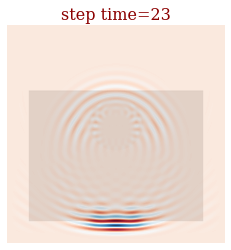

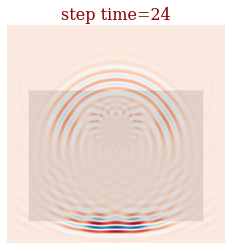

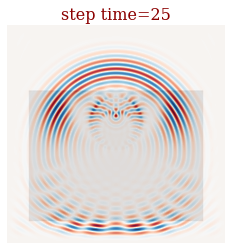

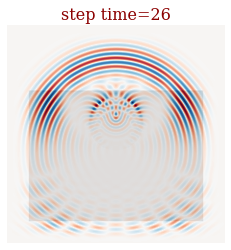

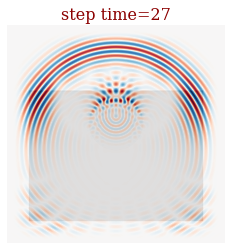

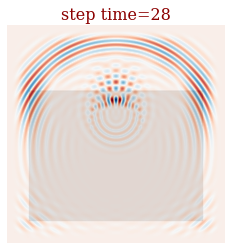

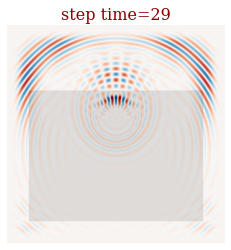

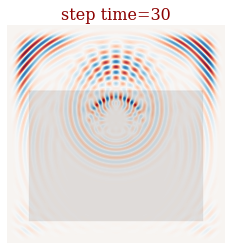

In [45]:
#ploting E in every step time
k=E_image.shape
s=np.zeros((k[0],k[1]))



font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
d = np.linspace(-10, 10, 1000)



for i in range(k[2]):
    s = E_image[:, :, i]
    plt.figure(i)
    plt.title('step time='+str(i+1), fontdict=font)
    plt.imshow(eps_data.transpose(), interpolation='spline36', cmap='binary')
    plt.imshow(s.transpose(), interpolation='spline36', cmap='RdBu', alpha=0.9)
    plt.xlabel('x (um)', fontdict=font)
    plt.ylabel('y(um)', fontdict=font)
    plt.axis('off')
    plt.show()